## Decision Tree Classification of Poisonous Mushrooms

In [1]:
import sys

sys.path.append('./src/')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from plot_tree import plot_decision_tree

Issues with importing plotting function from file? Need to run the following in the command line:

       conda install -c anaconda graphviz  
       conda install -c anaconda python-graphviz
       conda install -c anaconda pydotplus

In [2]:
mushdf = pd.read_csv('data/mushrooms.csv')

mushdf.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


We need to create new data frame of  indicator variables because Decision Trees / Random Forests from scikit-learn do not tolerate strings, only numeric values for features. This is known as one-hot encoding or binarization. 

NOTE: It is possible to use scikit-learn's LabelEncoder for ordinal categorical features, but the current labels for the data do not appear to have any ordinality:

cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s  
cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s  
cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y  
bruises?: bruises=t, no=f  
odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s  
gill-attachment: attached=a, descending=d, free=f, notched=n  
gill-spacing: close=c, crowded=w, distant=d  
gill-size: broad=b, narrow=n  
gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y  
stalk-shape: enlarging=e, tapering=t  
stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?  
stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s  
stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s  
stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y  
stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y  
veil-type: partial=p, universal=u  
veil-color: brown=n, orange=o, white=w, yellow=y  
ring-number: none=n, one=o, two=t  
ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z  
spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y  
population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y  
habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

In [3]:
mushdf = pd.get_dummies(mushdf)

mushdf.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
X_mush = mushdf.iloc[:,2:]
y_mush = mushdf.iloc[:,1] # class_p (0=edible, 1=poisonous)

X_train, X_test, y_train, y_test = train_test_split(X_mush, y_mush, random_state=650)

Let's fit a Decision Tree with default parameters in an attempt to classify the data and to examine feature importances to get a sense for what features are most informative when classifying poisonous mushrooms.

In [5]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)
    
fimportance = list(zip(X_train.columns, dtc.feature_importances_))
fimportance.sort(key = lambda x: x[1], reverse=True)

fimportance

[('odor_n', 0.61373530958701517),
 ('stalk-root_c', 0.18191140160360034),
 ('stalk-root_r', 0.084545474419561437),
 ('spore-print-color_r', 0.03252554203474399),
 ('odor_l', 0.024028178192119477),
 ('odor_a', 0.023351290812923944),
 ('stalk-surface-above-ring_s', 0.016593447970085492),
 ('stalk-surface-below-ring_y', 0.013149931308213451),
 ('population_y', 0.0055747449271641575),
 ('cap-surface_g', 0.0026166653108328089),
 ('bruises_t', 0.0012942718318897869),
 ('cap-shape_c', 0.0006554783339812176),
 ('gill-size_b', 1.8263667868635858e-05),
 ('cap-shape_b', 0.0),
 ('cap-shape_f', 0.0),
 ('cap-shape_k', 0.0),
 ('cap-shape_s', 0.0),
 ('cap-shape_x', 0.0),
 ('cap-surface_f', 0.0),
 ('cap-surface_s', 0.0),
 ('cap-surface_y', 0.0),
 ('cap-color_b', 0.0),
 ('cap-color_c', 0.0),
 ('cap-color_e', 0.0),
 ('cap-color_g', 0.0),
 ('cap-color_n', 0.0),
 ('cap-color_p', 0.0),
 ('cap-color_r', 0.0),
 ('cap-color_u', 0.0),
 ('cap-color_w', 0.0),
 ('cap-color_y', 0.0),
 ('bruises_f', 0.0),
 ('odor_c'

## **Feature Selection**

Let's examine the dimensionality of our features

In [6]:
X_mush.shape

(8124, 117)

Dummy variable parameterization of categorical variables creates *i*-1 indicator variables for each original feature with *i* levels. Our original 22 features ha expanded to 117 features. This has implications when it comes to performance. 

Using sklearn's [SelectFromModel](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel) we can drop features that are not informative as measured by the estimated feature importance from the Decision Tree classifier.

The selected features we will use for learning are:

In [7]:
selected = SelectFromModel(dtc, prefit=True, threshold='.01*mean')

feature_mask = selected.get_support(indices=False)

X_mush_selected = X_mush[ X_mush.columns[feature_mask] ] 
X_mush_selected.columns

Index(['cap-shape_c', 'cap-surface_g', 'bruises_t', 'odor_a', 'odor_l',
       'odor_n', 'stalk-root_c', 'stalk-root_r', 'stalk-surface-above-ring_s',
       'stalk-surface-below-ring_y', 'spore-print-color_r', 'population_y'],
      dtype='object')

In [8]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush_selected, y_mush, random_state=650)

dtc2 = DecisionTreeClassifier().fit(X_train2,y_train2)

#feature importances
fimportance_selected = list(zip(X_train2.columns, dtc2.feature_importances_))
fimportance_selected.sort(key = lambda x: x[1], reverse=True)

fimportance_selected

[('odor_n', 0.61454054535052771),
 ('stalk-root_c', 0.18215007381957646),
 ('stalk-root_r', 0.084656400153476877),
 ('spore-print-color_r', 0.032568216342812775),
 ('odor_l', 0.02405970375062998),
 ('odor_a', 0.023381928278608299),
 ('stalk-surface-above-ring_s', 0.016615218980383869),
 ('stalk-surface-below-ring_y', 0.0131671843402807),
 ('population_y', 0.0055835505356685222),
 ('cap-surface_g', 0.0026200984398324148),
 ('cap-shape_c', 0.00065633833761549526),
 ('bruises_t', 7.4167058692903924e-07)]

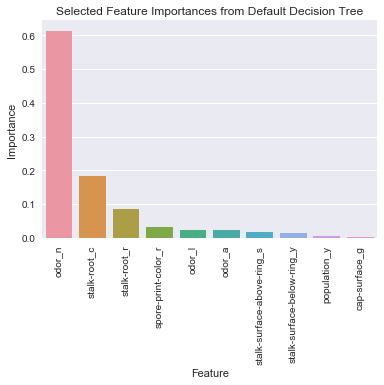

In [9]:
features = list(list(zip(*fimportance))[0])[:10]
importances = list(list(zip(*fimportance))[1])[:10]

%matplotlib inline

plt.figure()
sns.barplot(x=features, y=importances)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Selected Feature Importances from Default Decision Tree')

for item in plt.gca().xaxis.get_ticklabels():
    item.set_rotation(90)

It appears that the most informative features are odor and the stalk root.

Let's examine how well the Decision Tree with default parameters does at classifying the mushrooms

In [10]:
print('Mushroom dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(dtc2.score(X_train2, y_train2)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(dtc2.score(X_test2, y_test2)))

Mushroom dataset: decision tree
Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 1.00


## Visualizing the Tree

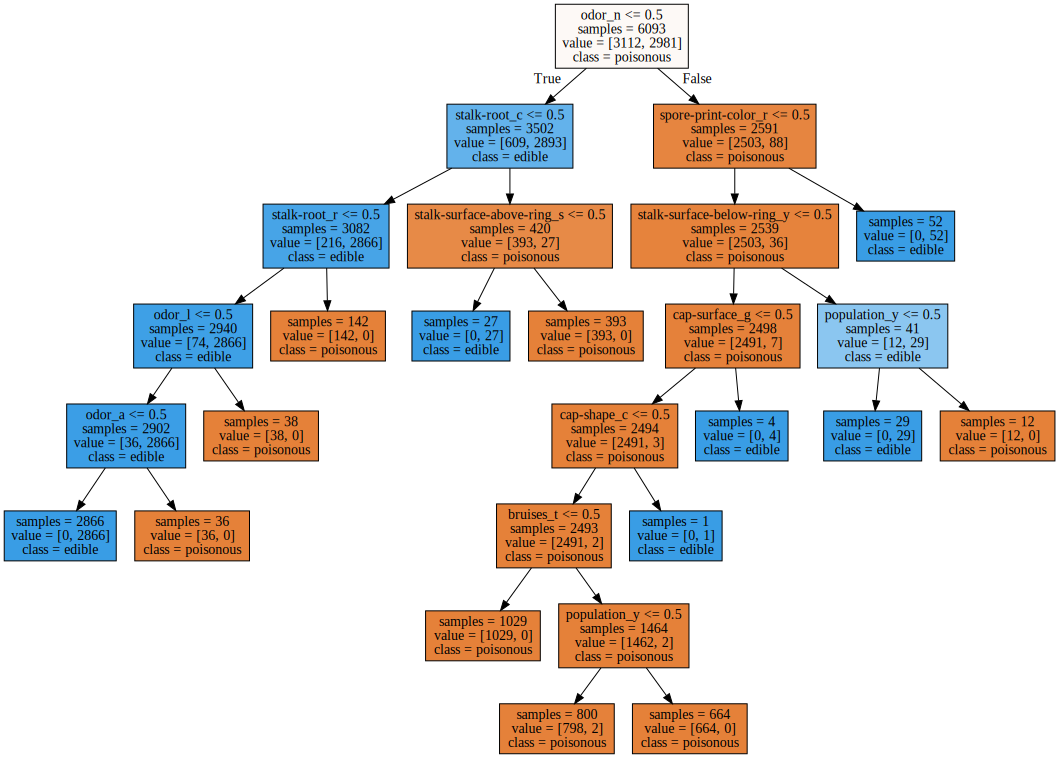

In [11]:
plot_decision_tree(dtc2, X_mush_selected.columns, ['poisonous','edible'])

## Tuning Hyperparameters with GridSearchCV

can we tune parameters after reducing dimensionality without data leakage issues??

In [12]:
#from sklearn.pipeline import Pipeline

#tune max_depth, min_samples_leaf